In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import country_converter as coco
from datetime import date,datetime

In [2]:
data=pd.read_csv("ds_salaries.csv")

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Short Analysis

In [4]:
#Statical analysis
data.describe()


#Here we have Work year column that is a date but showing as integer value.
#in salary in usd section the average salary is 101570 for all job roles.
#Salary column has different currencies that is why it will be removed.
#Remote ratio should be a object because it is showing only the three possible condition. 

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
data.info()
#Here the column name remote_ratio is int64 type but it should be object
# And have some useless columns that's need to be delete.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Data Cleaning

In [6]:
#Drop the useless columns
#Unnamed: 0, salary, salary_currency these three are the useless columns

data.drop(['Unnamed: 0','salary','salary_currency'],axis=1,inplace=True)

In [7]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [8]:
#Now the data has usefull columns only.
#From here we need to change the work_year from int to datatime.
data['date']=pd.to_datetime(data['work_year'])
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,date
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,1970-01-01 00:00:00.000002020
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1970-01-01 00:00:00.000002020
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,1970-01-01 00:00:00.000002020
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,1970-01-01 00:00:00.000002020
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,1970-01-01 00:00:00.000002020


In [9]:
#This is not possible because the date is not in correct form and showing wrong dates
data.drop(['date'],axis=1,inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [10]:
#Now let's check the null values if any

data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
#This data has no null value
#Now let's change the short form values into full form 
#Starting with experience_level

data.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [12]:
#Here we have 4 different experience level are that's need to be changed
experience_levels={'MI':'Mid-Level','SE':'Senior-Level','EN':'Entry-Level','EX':'Executive-Level'}

In [13]:
#Checkpoint
data1=data.copy()

In [14]:
for i in data.index:
    if data1['experience_level'][i]=='MI':
        data1['experience_level'][i]='Mid-Level'
    elif data1['experience_level'][i]=="SE":
        data1['experience_level'][i]='Senior-Level'
    elif data1['experience_level'][i]=='EN':
        data1['experience_level'][i]='Entry-Level'
    elif data1['experience_level'][i]=='EX':
        data1['experience_level'][i]='Executive-level'
    else:
        data1['experience_level']
    
data1.head()

<ipython-input-14-956ad2671bfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['experience_level'][i]='Mid-Level'
<ipython-input-14-956ad2671bfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['experience_level'][i]='Senior-Level'
<ipython-input-14-956ad2671bfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['experience_level'][i]='Entry-Level'
<ipython-input-14-956ad2671bfd>:9: SettingWithCopyWarning: 
A value 

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior-Level,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior-Level,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,US,50,US,L


In [15]:
data1['experience_level'].unique()
#Now we don't have to change the all remaing becuase we will change it into dummies before machine leaning

array(['Mid-Level', 'Senior-Level', 'Entry-Level', 'Executive-level'],
      dtype=object)

In [16]:
#Let's look at the duplicates values
data1.duplicated().sum()

42

In [17]:
#Data has 42 duplicates and we need to remove this
data1.drop_duplicates(inplace=True)

In [18]:
data1.duplicated().sum()

0

### Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

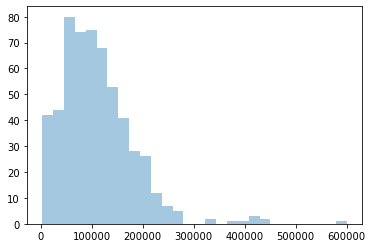

In [19]:
sns.distplot(x=data1['salary_in_usd'],kde=False)

In [20]:
#Here the salary is limited to almost 250000 remaing should be remove by using percentile
min_thresold=data1['salary_in_usd'].quantile(0.001)
max_thresold=data1['salary_in_usd'].quantile(0.95)
min_thresold,max_thresold

(3502.524, 223221.99999999983)

In [21]:
data1[data1['salary_in_usd']>max_thresold]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,Senior-Level,FT,Machine Learning Scientist,260000,JP,0,JP,S
25,2020,Executive-level,FT,Director of Data Science,325000,US,100,US,L
33,2020,Mid-Level,FT,Research Scientist,450000,US,0,US,M
37,2020,Entry-Level,FT,Machine Learning Engineer,250000,US,50,US,L
63,2020,Senior-Level,FT,Data Scientist,412000,US,100,US,L
74,2021,Executive-level,FT,Head of Data,235000,US,100,US,L
78,2021,Mid-Level,CT,ML Engineer,270000,US,100,US,L
93,2021,Senior-Level,FT,Lead Data Engineer,276000,US,0,US,L
97,2021,Mid-Level,FT,Financial Data Analyst,450000,US,100,US,L
115,2021,Entry-Level,FT,Machine Learning Scientist,225000,US,100,US,L


In [22]:
data1[data1['salary_in_usd']>max_thresold].shape

(29, 9)

In [23]:
data1[data1['salary_in_usd']<min_thresold]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,Mid-Level,FT,Data Scientist,2859,MX,0,MX,S


In [24]:
data2=data1[(data1['salary_in_usd']>min_thresold)&(data1['salary_in_usd']<max_thresold)]

In [25]:
data2.shape

(535, 9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

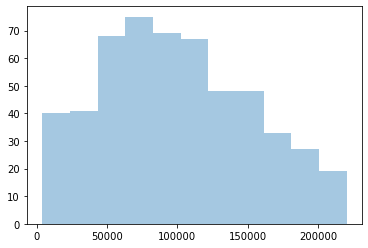

In [26]:
sns.distplot(x=data2['salary_in_usd'],kde=False)

In [27]:
data2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,DE,0,DE,L
2,2020,Senior-Level,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,US,50,US,L
5,2020,Entry-Level,FT,Data Analyst,72000,US,100,US,L


In [28]:
#Now convert the company_location and employee_residence into country name
data2['employee_residence']=coco.convert(names=data2['employee_residence'],to='name_short')

<ipython-input-28-74efc5dfd3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['employee_residence']=coco.convert(names=data2['employee_residence'],to='name_short')


In [29]:
data2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,Germany,0,DE,L
2,2020,Senior-Level,FT,Big Data Engineer,109024,United Kingdom,50,GB,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,Honduras,0,HN,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,United States,50,US,L
5,2020,Entry-Level,FT,Data Analyst,72000,United States,100,US,L


In [30]:
#Now do the same with company location column
coco.convert(names=data2['company_location'],to='name_short')

['Germany',
 'United Kingdom',
 'Honduras',
 'United States',
 'United States',
 'United States',
 'Hungary',
 'United States',
 'New Zealand',
 'France',
 'India',
 'France',
 'United States',
 'United States',
 'Pakistan',
 'Japan',
 'United Kingdom',
 'India',
 'United States',
 'China',
 'India',
 'Greece',
 'United States',
 'United Arab Emirates',
 'Netherlands',
 'Mexico',
 'United States',
 'Canada',
 'Germany',
 'United States',
 'United States',
 'France',
 'Austria',
 'United States',
 'Nigeria',
 'United States',
 'United States',
 'Spain',
 'Portugal',
 'United States',
 'United Kingdom',
 'Germany',
 'United Kingdom',
 'United States',
 'United States',
 'France',
 'India',
 'United States',
 'Denmark',
 'Germany',
 'United States',
 'Germany',
 'Spain',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Italy',
 'Croatia',
 'Germany',
 'Germany',
 'United States',
 'United States',
 'Austria',
 'Luxembourg',
 'France',
 'United Ki

In [31]:
#Apply changes
data2['company_location']=coco.convert(names=data2['company_location'],to='name_short')
data2.head()

<ipython-input-31-7d9207a582df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['company_location']=coco.convert(names=data2['company_location'],to='name_short')


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,Germany,0,Germany,L
2,2020,Senior-Level,FT,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,Honduras,0,Honduras,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,United States,50,United States,L
5,2020,Entry-Level,FT,Data Analyst,72000,United States,100,United States,L


### Exploratory Analysis

In [42]:
#let's see how which profession is getting more pay
fig=px.bar(data2.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10),
           x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},
           template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

In [48]:
#How many oppertunities are available for each position wiith experience level
fig=px.pie(data2.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),
           names='experience_level',values='salary_in_usd',color='experience_level',
           labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',
           title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',
                                          y=1.02,xanchor='right',x=1))

In [51]:
fig=px.pie(data2.groupby('experience_level',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10),
           names='experience_level',values='salary_in_usd',color='experience_level',
           labels={'experience_level':'Experience level ','salary_in_usd':'Average Salary'},template='ggplot2',
           title='<b>Total Salary Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',
                                          y=1.02,xanchor='right',x=1))

In [53]:
fig=px.pie(data2.groupby('remote_ratio',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10),
           names='remote_ratio',values='salary_in_usd',color='remote_ratio',hole=0.5,
           labels={'remote_ratio':'Remote Ratio','salary_in_usd':'Average Salary'},template='plotly',
           title='<b>Average salary by Remote Ratio')
fig.update_layout(title_x=0.5)

In [55]:
#What are the Top 10 Countries who are paying more salaries to data scientist
fig=px.bar(data2.groupby('company_location',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10),
           x='company_location',y='salary_in_usd',color='company_location',labels={'company_location':'Country','salary_in_usd':'salary in usd'},
           template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science by Country')
fig.show()

In [54]:
data2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,Germany,0,Germany,L
2,2020,Senior-Level,FT,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,Honduras,0,Honduras,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,United States,50,United States,L
5,2020,Entry-Level,FT,Data Analyst,72000,United States,100,United States,L


In [57]:
#Now lets see how salary changes by year
fig=px.bar(data2.groupby('work_year',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10),
           x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'Year','salary_in_usd':'salary in usd'},
           template='ggplot2',text='salary_in_usd',title='<b> Salary by year')
fig.show()

In [60]:
#Let's see how many people are getting more jobs by employment type
fig=px.pie(data2.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False),
           names='employment_type',values='salary_in_usd',color='employment_type',
           labels={'employment_type':'Employment Type','salary_in_usd':'Total Jobs'},template='plotly',
           title='<b>Total jobs by Employment Type')
fig.update_layout(title_x=0.5)

In [61]:
#What is the average salary of each employment type
fig=px.pie(data2.groupby('employment_type',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False),
           names='employment_type',values='salary_in_usd',color='employment_type',hole=0.8,
           labels={'employment_type':'Employment Type','salary_in_usd':'Average Salary'},template='plotly',
           title='<b>Average salary by Employment type')
fig.update_layout(title_x=0.5)

In [64]:
#What size of companies are offering more jobs
px.funnel(data2.groupby('company_size',as_index=False)['experience_level'].count().sort_values(by='experience_level',
                    ascending=False).head(15),y='company_size',x='experience_level',
          color_discrete_sequence=['orange'],labels={'experience_level':'count'},
          template='seaborn',title='<b> Jobs opening by Company Sizes')

In [67]:
#Check point
data3=data2.copy()

### Dummies

In [69]:
data3.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,79833,Germany,0,Germany,L


In [71]:
#Firstly, make dummies of experience_level
experience_dummies=pd.get_dummies(data3['experience_level'],drop_first=True)
experience_dummies

,Executive-level,Mid-Level,Senior-Level
0,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,0,0
...,...,...,...
602,0,0,1
603,0,0,1
604,0,0,1
605,0,0,1


In [72]:
#Check for any error
experience_dummies['Check']=experience_dummies.sum(axis=1)

In [73]:
experience_dummies

,Executive-level,Mid-Level,Senior-Level,Check
0,0,1,0,1
2,0,0,1,1
3,0,1,0,1
4,0,0,1,1
5,0,0,0,0
...,...,...,...,...
602,0,0,1,1
603,0,0,1,1
604,0,0,1,1
605,0,0,1,1


In [74]:
experience_dummies['Check'].sum()
#Remaining are the missing are the first drop values

449

In [75]:
experience_dummies['Check'].unique()

array([1, 0], dtype=int64)

In [76]:
experience_dummies.drop(['Check'],axis=1,inplace=True)

In [84]:
#Concat the two datasets 
data3=pd.concat([data3,experience_dummies],axis=1)

In [85]:
data3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Executive-level,Mid-Level,Senior-Level
0,2020,Mid-Level,FT,Data Scientist,79833,Germany,0,Germany,L,0,1,0
2,2020,Senior-Level,FT,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M,0,0,1
3,2020,Mid-Level,FT,Product Data Analyst,20000,Honduras,0,Honduras,S,0,1,0
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,United States,50,United States,L,0,0,1
5,2020,Entry-Level,FT,Data Analyst,72000,United States,100,United States,L,0,0,0


In [87]:
#Now do same with employement_type but first let's change it into full forms
data3['employment_type']=data3['employment_type'].map({'FT':'Full-Time','CT':'Contract-Based','PT':'Part-Time','FL':'Freelancer'})

In [89]:
data3['employment_type'].unique()

array(['Full-Time', 'Contract-Based', 'Part-Time', 'Freelancer'],
      dtype=object)

In [90]:
#Now create dummies

employee_dummies=pd.get_dummies(data3['employment_type'],drop_first=True)

In [91]:
employee_dummies

,Freelancer,Full-Time,Part-Time
0,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
602,0,1,0
603,0,1,0
604,0,1,0
605,0,1,0


In [93]:
#Check for any error
employee_dummies['check']=employee_dummies.sum(axis=1)
employee_dummies['check'].unique()

array([2, 0], dtype=int64)

In [94]:
employee_dummies

,Freelancer,Full-Time,Part-Time,check
0,0,1,0,2
2,0,1,0,2
3,0,1,0,2
4,0,1,0,2
5,0,1,0,2
...,...,...,...,...
602,0,1,0,2
603,0,1,0,2
604,0,1,0,2
605,0,1,0,2


In [95]:
#Drop the column
employee_dummies.drop(['check'],axis=1,inplace=True)

In [96]:
#Now Concat this also with main data set
data3=pd.concat([data3,employee_dummies],axis=1)

In [97]:
data3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Executive-level,Mid-Level,Senior-Level,Freelancer,Full-Time,Part-Time
0,2020,Mid-Level,Full-Time,Data Scientist,79833,Germany,0,Germany,L,0,1,0,0,1,0
2,2020,Senior-Level,Full-Time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M,0,0,1,0,1,0
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,Honduras,0,Honduras,S,0,1,0,0,1,0
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,150000,United States,50,United States,L,0,0,1,0,1,0
5,2020,Entry-Level,Full-Time,Data Analyst,72000,United States,100,United States,L,0,0,0,0,1,0


In [98]:
#Dummies for Job_title
job_dummies=pd.get_dummies(data3['job_title'],drop_first=True)
job_dummies

,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,Computer Vision Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#Looking for unique values
data3['job_title'].unique()

array(['Data Scientist', 'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Research Scientist', 'Machine Learning Manager',
       'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Director of Data Science',
       'Marketing Data Analyst', 'Cloud Data Engineer',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer', 'Applied Machine Learning Scientist',
       'Dat

In [104]:
#Counting the unique values and these are alot
data3['job_title'].nunique()

49

In [105]:
#Let's add these for now
data3=pd.concat([data3,job_dummies],axis=1)
data3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Executive-level,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
0,2020,Mid-Level,Full-Time,Data Scientist,79833,Germany,0,Germany,L,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,Senior-Level,Full-Time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,Honduras,0,Honduras,S,0,...,0,0,0,0,0,0,0,1,0,0
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,150000,United States,50,United States,L,0,...,0,0,0,0,0,0,0,0,0,0
5,2020,Entry-Level,Full-Time,Data Analyst,72000,United States,100,United States,L,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#Dummies for remote_ratio
remote_dummies=pd.get_dummies(data3['remote_ratio'],drop_first=True)
#Check for any error
remote_dummies['check']=remote_dummies.sum(axis=1)
#Look at the unique values
remote_dummies['check'].unique()

array([0, 1], dtype=int64)

In [107]:
remote_dummies

,50,100,check
0,0,0,0
2,1,0,1
3,0,0,0
4,1,0,1
5,0,1,1
...,...,...,...
602,0,1,1
603,0,1,1
604,0,0,0
605,0,1,1


In [108]:
#Now remove the check 
remote_dummies.drop(['check'],axis=1,inplace=True)
remote_dummies

,50,100
0,0,0
2,1,0
3,0,0
4,1,0
5,0,1
...,...,...
602,0,1
603,0,1
604,0,0
605,0,1


In [109]:
#Concat this with data3
data3=pd.concat([data3,remote_dummies],axis=1)
data3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Executive-level,...,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,50,100
0,2020,Mid-Level,Full-Time,Data Scientist,79833,Germany,0,Germany,L,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,Senior-Level,Full-Time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,Honduras,0,Honduras,S,0,...,0,0,0,0,0,1,0,0,0,0
4,2020,Senior-Level,Full-Time,Machine Learning Engineer,150000,United States,50,United States,L,0,...,0,0,0,0,0,0,0,0,1,0
5,2020,Entry-Level,Full-Time,Data Analyst,72000,United States,100,United States,L,0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
#Dummies for company_location
data3['company_location'].unique()

array(['Germany', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan', 'Japan',
       'China', 'Greece', 'United Arab Emirates', 'Netherlands', 'Mexico',
       'Canada', 'Austria', 'Nigeria', 'Spain', 'Portugal', 'Denmark',
       'Italy', 'Croatia', 'Luxembourg', 'Poland', 'Singapore', 'Romania',
       'Iraq', 'Brazil', 'Belgium', 'Ukraine', 'Israel', 'Russia',
       'Malta', 'Chile', 'Iran', 'Colombia', 'Moldova', 'Kenya',
       'Slovenia', 'Switzerland', 'Vietnam', 'American Samoa', 'Turkey',
       'Czech Republic', 'Algeria', 'Estonia', 'Malaysia', 'Australia',
       'Ireland'], dtype=object)

In [112]:
data3['company_location'].nunique()
#I will not consider this because of a lot unique values

50

In [118]:
#Dummies for company_size
company_dummies=pd.get_dummies(data3['company_size'],drop_first=True)
company_dummies['check']=company_dummies.sum(axis=1)
company_dummies['check'].unique()

array([0, 1], dtype=int64)

In [119]:
company_dummies.drop(['check'],axis=1,inplace=True)

In [120]:
company_dummies

,M,S
0,0,0
2,1,0
3,0,1
4,0,0
5,0,0
...,...,...
602,1,0
603,1,0
604,1,0
605,1,0


In [121]:
#Concat with data3
data3=pd.concat([data3,company_dummies],axis=1)
data3.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Executive-level,...,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,50,100,M,S
0,2020,Mid-Level,Full-Time,Data Scientist,79833,Germany,0,Germany,L,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Remove unwanted columns

In [122]:
data3.drop(['work_year','experience_level','employment_type','job_title','employee_residence',
            'remote_ratio','company_location','company_size'],axis=1,inplace=True)

In [123]:
data3.head(1)

,salary_in_usd,Executive-level,Mid-Level,Senior-Level,Freelancer,Full-Time,Part-Time,AI Scientist,Analytics Engineer,Applied Data Scientist,...,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,50,100,M,S
0,79833,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#Rearrage the columns
data3.columns

Index([                           'salary_in_usd',
                                'Executive-level',
                                      'Mid-Level',
                                   'Senior-Level',
                                     'Freelancer',
                                      'Full-Time',
                                      'Part-Time',
                                   'AI Scientist',
                             'Analytics Engineer',
                         'Applied Data Scientist',
             'Applied Machine Learning Scientist',
                                'BI Data Analyst',
                             'Big Data Architect',
                              'Big Data Engineer',
                          'Business Data Analyst',
                            'Cloud Data Engineer',
                       'Computer Vision Engineer',
              'Computer Vision Software Engineer',
                                   'Data Analyst',
                        'Data A

In [128]:
columns=[50,
                                              100,
                                              'M',
                                              'S',
                                'Executive-level',
                                      'Mid-Level',
                                   'Senior-Level',
                                     'Freelancer',
                                      'Full-Time',
                                      'Part-Time',
                                   'AI Scientist',
                             'Analytics Engineer',
                         'Applied Data Scientist',
             'Applied Machine Learning Scientist',
                                'BI Data Analyst',
                             'Big Data Architect',
                              'Big Data Engineer',
                          'Business Data Analyst',
                            'Cloud Data Engineer',
                       'Computer Vision Engineer',
              'Computer Vision Software Engineer',
                                   'Data Analyst',
                        'Data Analytics Engineer',
                         'Data Analytics Manager',
                                 'Data Architect',
                                  'Data Engineer',
                       'Data Engineering Manager',
                        'Data Science Consultant',
                          'Data Science Engineer',
                           'Data Science Manager',
                                 'Data Scientist',
                                'Data Specialist',
                   'Director of Data Engineering',
                       'Director of Data Science',
                                  'ETL Developer',
                           'Finance Data Analyst',
                         'Financial Data Analyst',
                                   'Head of Data',
                           'Head of Data Science',
                       'Head of Machine Learning',
                              'Lead Data Analyst',
                             'Lead Data Engineer',
                            'Lead Data Scientist',
                 'Lead Machine Learning Engineer',
                                    'ML Engineer',
                     'Machine Learning Developer',
                      'Machine Learning Engineer',
       'Machine Learning Infrastructure Engineer',
                       'Machine Learning Manager',
                     'Machine Learning Scientist',
                         'Marketing Data Analyst',
                                   'NLP Engineer',
                         'Principal Data Analyst',
                        'Principal Data Engineer',
                       'Principal Data Scientist',
                           'Product Data Analyst',
                             'Research Scientist',
                           'Staff Data Scientist','salary_in_usd'
                                               ]

In [129]:
data3=data3[columns]
data3.head()

,50,100,M,S,Executive-level,Mid-Level,Senior-Level,Freelancer,Full-Time,Part-Time,...,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,salary_in_usd
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,79833
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,109024
3,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,20000
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,150000
5,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,72000


In [130]:
preprocessed_data=data3.copy()

In [131]:
#Save this file 
preprocessed_data.to_csv('Data Preprocessed.csv')